In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from optimizer import *
from two_layer_net import TwoLayerNet

In [9]:
# Data setting - Iris
df = pd.read_csv('Fisher.txt', sep='\t')
x_train = np.array(df.iloc[:140, 1:])
x_test = np.array(df.iloc[140:, 1:])

target = np.array(df.iloc[:, 0])
target_encoded = []
for data in target:
    tmp = [0, 0, 0]
    if data == 0:
        tmp[0] = 1
    if data == 1:
        tmp[1] = 1
    if data == 2:
        tmp[2] = 1
    target_encoded.append(tmp)

t_train = np.array(target_encoded[:140])
t_test = np.array(target_encoded[140:])

# network class
network = {
    "SGD" : TwoLayerNet(input_size=4, hidden_size=10, output_size=3),
    "Momentum" : TwoLayerNet(input_size=4, hidden_size=10, output_size=3),
    "AdaGrad" : TwoLayerNet(input_size=4, hidden_size=10, output_size=3),
    "Adam" : TwoLayerNet(input_size=4, hidden_size=10, output_size=3)
}

In [ ]:
# Data Importing Part
df = pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')
x_train = np.array(df.iloc[:500, :-1])
x_test = np.array(df.iloc[500:, :-1])

target = np.array(df.iloc[:, -1])
target_encoded = []
for data in target:
    tmp = [0, 0]
    if data == 2:
        tmp[0] = 1
    if data == 4:
        tmp[1] = 1
    target_encoded.append(tmp)

t_train = np.array(target_encoded[:500])
t_test = np.array(target_encoded[500:])

# network class
network = {
    "SGD" : TwoLayerNet(input_size=9, hidden_size=200, output_size=2),
    "Momentum" : TwoLayerNet(input_size=9, hidden_size=200, output_size=2),
    "AdaGrad" : TwoLayerNet(input_size=9, hidden_size=200, output_size=2),
    "Adam" : TwoLayerNet(input_size=9, hidden_size=200, output_size=2)
}

In [14]:
# initializing part
# hyper-parameters, epochs
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 10
learning_rate = 0.1

train_loss_list = {
    "SGD" : [],
    "Momentum" : [],
    "AdaGrad" : [],
    "Adam" : []
}
train_acc_list = {
    "SGD" : [],
    "Momentum" : [],
    "AdaGrad" : [],
    "Adam" : []
}
test_acc_list = {
    "SGD" : [],
    "Momentum" : [],
    "AdaGrad" : [],
    "Adam" : []
}

iter_per_epoch = max(train_size / batch_size, 1)

In [15]:
# set optimizer
optimizers = {
    "SGD" : SGD(lr=0.1),
    "Momentum" : Momentum(lr=0.1),
    "AdaGrad" : AdaGrad(lr=1.5),
    "Adam" : Adam(lr=0.3)
}

In [16]:
# train
for key, optimizer in optimizers.items():
    print(key)
    for i in range(iters_num):
        # 미니배치 획득
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # 기울기 계산
        #grad = network.numerical_gradient(x_batch, t_batch)
        grad = network[key].gradient(x_batch, t_batch)

        # 매개변수
        optimizer.update(network[key].params, grad)

        # 학습 경과 기록
        loss = network[key].loss(x_batch, t_batch)
        train_loss_list[key].append(loss)

        # 1에폭당 정확도 계산
        if i % iter_per_epoch == 0:
            train_acc = network[key].accuracy(x_train, t_train)
            test_acc = network[key].accuracy(x_test, t_test)
            train_acc_list[key].append(train_acc)
            test_acc_list[key].append(test_acc)
            print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

SGD
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.8928571428571429, 1.0
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.9428571428571428, 1.0
train acc, test acc | 0.928571

train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714

train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6714285714285714, 0.6
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571428571, 0.8
train acc, test acc | 0.6571428571

train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, te

train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, te

train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, te

train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, te

train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, te

train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, te

train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, te

train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, te

train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, te

train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.32857142857142857, 0.4
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.34285714285714286, 0.2
train acc, test acc | 0.32857142857142857, 0.4
train acc, te

In [ ]:
# draw separate
markers = {'train': 'o', 'test': 's'}
key = 'Adam'
x = np.arange(len(train_acc_list[key]))
plt.plot(x, train_acc_list[key], label='train acc')
plt.plot(x, test_acc_list[key], label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'accuracy')

(0.0, 1.0)

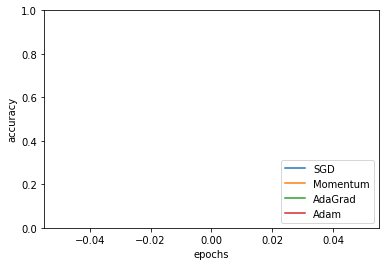

In [13]:
# draw them all - train
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list['SGD']))
for key in optimizers:
    plt.plot(x, train_acc_list[key], label=key)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# draw them all - test

In [ ]:
# draw them all - train + test